# Data exploration

Importing libraries

In [2]:
from testcode import analyzeImageAndMaks
from testcode import visualizeDataN1
from nnmod import linearFilter
# from src.datamod01 import loadDataN1
# from src.datamod01 import pickleData
# from src.datamod01 import createMainDataBatches
# from src.datamod01 import createCropBatches
from testcode import analyzeOriginalCrops
from datamod import loadPickle
from nnmod import *
from torch.autograd import Variable
import matplotlib.pyplot as plt
from constants import DATA

%matplotlib inline

Read data and serialize

In [4]:
# data = loadDataN1()
# pickleData(DATA+"pickle/dataN1.p", data)

Load and visualize data

number of training images loaded :  670
image id :  337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf
original shape of data :  [256 320]


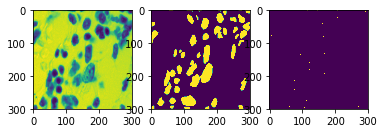

In [2]:
dataN1 = loadPickle(DATA+"pickle/dataN1.p")

visualizeDataN1(dataN1)

Hand engineer lienar feature

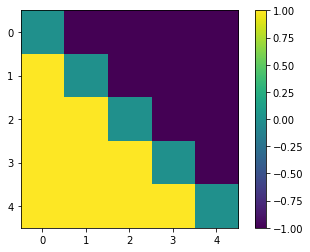

In [11]:
disp = plt.imshow(linearFilter(5,3))
colorbar = plt.colorbar()

Build simple network for single layer convolution with the engineered feature

In [14]:
net_line1 = singleFilterConv(linearFilter(5, direction=3)).cuda()
print(net_line1)

singleFilterConv(
  (conv1): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
)


Perform convolution

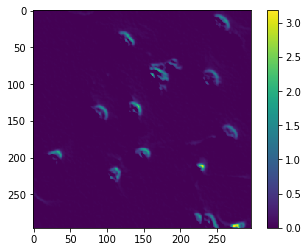

In [16]:
img_input = dataN1["images"][6]

input01 = Variable(torch.from_numpy(img_input).float()).cuda()
out = net_line1(input01)

out = out.cpu()
vis = out.data.numpy()[0,0,:]

disp = plt.imshow(vis)
colorbar = plt.colorbar()

Creating main data mini batches

In [4]:
# createMainDataBatches('train')
# createMainDataBatches('test')

Histo gram of image shape (rows, columns) and mask areas

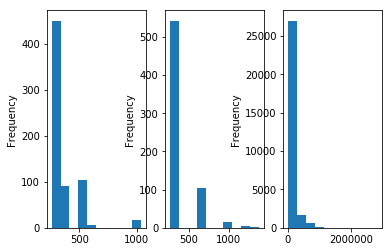

In [3]:
# analyzeImageAndMaks()

shapes, sizes = loadPickle(DATA+'pickle/analysis/OriginaImagAndMaskStats.p')

fig = plt.figure()

fig.add_subplot(1, 3, 1)
disp1 = shapes['rows'].plot.hist()

fig.add_subplot(1, 3, 2)
disp2 = shapes['columns'].plot.hist()

fig.add_subplot(1, 3, 3)
disp3 = sizes['area'].plot.hist()

Create crop batches of nuclei for backbone network training

In [1]:
# createCropBatches()

Analyze crop sizes

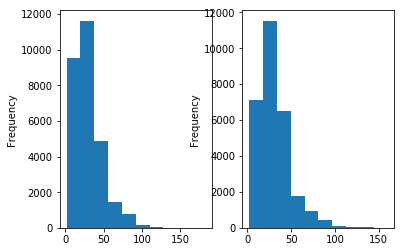

In [6]:
# analyzeOriginalCrops()

shapes = loadPickle(DATA+'pickle/analysis/originalCropsStats.p')

fig = plt.figure()

fig.add_subplot(1, 2, 1)
disp1 = shapes['rows'].plot.hist()

fig.add_subplot(1, 2, 2)
disp2 = shapes['columns'].plot.hist()

Encode training crops

In [ ]:
# from src.datamod01 import encodeCrop2jpg
# encodeCrop2jpg()

Encode CIFAR10 images

In [ ]:
# from src.datamod01 import encodeCIFAR2jpg
# encodeCIFAR2jpg()

Train backbone network

In [ ]:
# from src.nnmod01 import trainBackbone
# trainBackbone01(batch_size=1000, epochs=4,
#                 a=0.001, b=0.1,
#                 save_model=False)